<a href="https://colab.research.google.com/github/chillMLguy/ML24-25L/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praca domowa nr 5**

<ipython-input-14-baad9c57ed68>:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


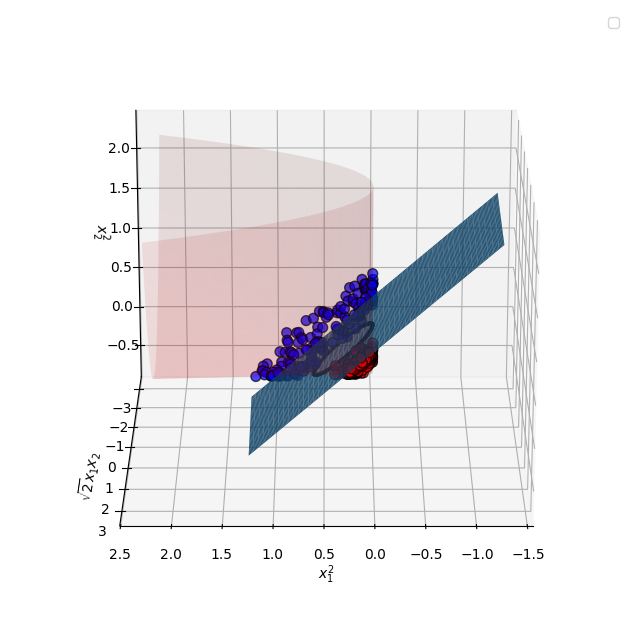

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.datasets import make_circles


np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)
y = np.where(y == 0, -1, 1)


clf = SVC(kernel='poly', degree=2, C=1, coef0=0, gamma=1)
clf.fit(X, y)


phi = lambda x: np.array([x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2])
phi_X = np.array([phi(x) for x in X])


clf2 = SVC(kernel='linear', C=1)
clf2.fit(phi_X, y)
w = clf2.coef_[0]
b = clf2.intercept_[0]


#paraboloida
u = np.linspace(-1.5, 1.5, 50)
v = np.linspace(-1.5, 1.5, 50)
U, V = np.meshgrid(u, v)
X_parab = U**2
Y_parab = np.sqrt(2)*U*V
Z_parab = V**2

#siatka
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
phi_grid = np.array([phi(x) for x in grid])
decision = clf.decision_function(grid)
zz = (-w[0] * xx - w[1] * yy - b) / w[2]




#wykres
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=y, cmap='bwr', edgecolor='k', s=50, alpha=0.7)

ax.plot_surface(X_parab, Y_parab, Z_parab, alpha=0.05, color='red',
                          edgecolor='none')


mask = np.isclose(decision, 0, atol=0.01)
ax.scatter(phi_grid[mask, 0], phi_grid[mask, 1], phi_grid[mask, 2], c='k', s=3)
ax.plot_surface(xx, yy, zz)
ax.view_init(elev=20, azim=90)


ax.set_xlabel('$x_1^2$')
ax.set_ylabel('$\sqrt{2}x_1x_2$')
ax.set_zlabel('$x_2^2$')
ax.legend()
plt.show()


Na wykresie zaznaczone są dwie granice decyzyjne. Jedna oryginalna, pokazana na zajęciach oraz druga, płaszczyzna rozdzielająca całą przestrzeń.

Dane zostały przekształcone przez phi. Phi definiuje nam dwuwymiarową płaszczyznę zakrzywioną w przestrzeń trójwymiarowej. Skoro przekształcamy dane w taki sposób, również granica decyzyjna będzie tak przekształcona, więc będzie ona leżeć na paraboloidzie.

Gdy zastosujemy liniowy SVM w tej przestrzeni, znajduje on płaską hiperpłaszczyznę, która przecina paraboloidę i oddziela klasy. Przecięcie płaszczyzny z paraboloidą to elipsa. Mimo że granica decyzyjna w 3D jest liniowa, to po powrocie do oryginalnej przestrzeni 2D wygląda jak zakrzywiona granica, w naszym przypadku elipsa. Wynika to z faktu, że klasyfikator działa na przekształconych punktach leżących na zakrzywionej powierzchni.

